In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
import sklearn.preprocessing as pp
from sklearn.svm import SVC
sns.set_theme()
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [2]:
df = pd.read_csv(r'OJ.csv')
df = df.drop('Unnamed: 0', axis=1)
df

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.00,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.30,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.00,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.00,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.00,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,CH,252,7,1.86,2.09,0.10,0.00,0,0,0.587822,2.09,1.76,0.33,Yes,0.000000,0.053763,0.23,0
1066,CH,256,7,1.86,2.18,0.00,0.00,0,0,0.670258,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1067,MM,257,7,1.86,2.18,0.00,0.00,0,0,0.736206,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1068,CH,261,7,1.86,2.13,0.00,0.24,0,0,0.588965,1.89,1.86,0.03,Yes,0.112676,0.000000,0.27,0


In [3]:
df = pd.get_dummies(df, drop_first=True)

In [13]:
train_split, test_split = ms.train_test_split(df, train_size=0.748, random_state=5)
train_split

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,Purchase_MM,Store7_Yes
840,268,2,1.86,2.18,0.00,0.0,0,1,0.163840,2.18,1.86,0.32,0.000000,0.000000,0.32,2,0,0
93,244,7,1.86,2.09,0.00,0.2,0,0,0.600000,1.89,1.86,0.03,0.095694,0.000000,0.23,0,0,1
948,262,2,1.86,2.18,0.00,0.6,0,1,0.009319,1.58,1.86,-0.28,0.275229,0.000000,0.32,2,1,0
703,250,3,1.99,2.23,0.00,0.0,0,0,0.001889,2.23,1.99,0.24,0.000000,0.000000,0.24,3,1,0
610,251,7,1.86,2.09,0.10,0.0,0,0,0.600000,2.09,1.76,0.33,0.000000,0.053763,0.23,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,270,7,1.86,2.13,0.27,0.0,1,0,0.939664,2.13,1.59,0.54,0.000000,0.145161,0.27,0,0,1
73,278,4,2.09,2.09,0.20,0.0,0,0,0.855775,2.09,1.89,0.20,0.000000,0.095694,0.00,4,0,0
998,254,7,1.86,2.18,0.00,0.0,0,0,0.544000,2.18,1.86,0.32,0.000000,0.000000,0.32,0,0,1
206,241,7,1.86,2.09,0.00,0.0,0,0,0.813222,2.09,1.86,0.23,0.000000,0.000000,0.23,0,0,1


In [14]:
scaler = pp.StandardScaler()
train_split_norm = scaler.fit_transform(train_split)
test_split_norm = scaler.transform(test_split)

### 2.a

In [12]:
print(train_split.Purchase_MM.value_counts(normalize=True))
print(test_split.Purchase_MM.value_counts(normalize=True))

0    0.60625
1    0.39375
Name: Purchase_MM, dtype: float64
0    0.622222
1    0.377778
Name: Purchase_MM, dtype: float64


### 2.b

In [19]:
np.shape(np.delete(test_split_norm, -2, 1))

(270, 17)

In [26]:
Y_train = train_split.Purchase_MM
X_train = np.delete(train_split_norm, -2, 1)
Y_test = test_split.Purchase_MM
X_test = np.delete(test_split_norm, -2, 1)

In [27]:
svc_model = SVC(C=0.01, kernel='linear')
svc_model.fit(X=X_train, y=Y_train)

SVC(C=0.01, kernel='linear')

In [31]:
len(svc_model.support_vectors_)

447

446 support vectors were discovered. It's a simple model, thus the algorithm samples many points to generate the hyperplane.

In [30]:
2/np.linalg.norm(svc_model.coef_[0])

2.1705754779328017

The width of the margin is given by 2/magnitude of the hyperplane's orthogonal vector. Within sklearn, the coefficients represent the components of this hyperplane. The width of the margin was then calculated to be 2.17.

### 2.c

In [29]:
print(svc_model.score(X_test, Y_test))
print(svc_model.score(X_train, Y_train))

0.8296296296296296
0.82625


The classification scores are very similar for test and training. This makes sense because the soft-margin classification algorithm is using a linear kernel. This is a simple model, meaning that the variance should be low. The small C value means that high regularization penalty was inputted, which results in more points being sampled to generate the hyperplane and margins (simpler model).

### 2.d

In [70]:
svc_cv = SVC(kernel='linear')
precision = 20
param_grid = {'C': np.logspace(-2,1,precision)}
ridge_grid_cv = ms.GridSearchCV(svc_cv, param_grid, cv=10, n_jobs=-1)
ridge_grid_cv.fit(X_train, Y_train)
results = pd.DataFrame(ridge_grid_cv.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009202,0.000872,0.001200,4.003526e-04,0.01,{'C': 0.01},0.8500,0.7875,0.8000,0.8125,0.7750,0.8125,0.8250,0.8875,0.8750,0.7875,0.82125,0.036250,3
1,0.009202,0.000601,0.001300,4.582973e-04,0.014384,{'C': 0.01438449888287663},0.8375,0.7875,0.8000,0.8125,0.7750,0.8125,0.8250,0.8750,0.8750,0.7875,0.81875,0.033190,8
2,0.008402,0.001281,0.001600,1.200223e-03,0.020691,{'C': 0.0206913808111479},0.8375,0.7875,0.8125,0.8250,0.7625,0.8125,0.8250,0.8750,0.8750,0.7875,0.82000,0.034551,7
3,0.007701,0.000900,0.001001,5.941360e-07,0.029764,{'C': 0.029763514416313176},0.8375,0.7875,0.8000,0.8250,0.7625,0.8125,0.8250,0.8625,0.8625,0.8000,0.81750,0.030208,12
4,0.008702,0.000781,0.001000,2.384186e-07,0.042813,{'C': 0.04281332398719394},0.8375,0.7875,0.8125,0.8250,0.7750,0.8250,0.8250,0.8625,0.8500,0.7875,0.81875,0.026955,8
5,0.009402,0.000800,0.001000,4.579871e-07,0.061585,{'C': 0.06158482110660264},0.8375,0.7750,0.8000,0.8250,0.7750,0.8250,0.8250,0.8625,0.8500,0.7875,0.81625,0.029074,17
6,0.009602,0.000800,0.001000,2.977847e-07,0.088587,{'C': 0.08858667904100823},0.8125,0.7750,0.8000,0.8250,0.7750,0.8250,0.8250,0.8500,0.8500,0.7875,0.81250,0.026220,20
7,0.009502,0.000500,0.001000,2.145767e-07,0.127427,{'C': 0.12742749857031335},0.8250,0.7750,0.8125,0.8250,0.7750,0.8250,0.8250,0.8625,0.8625,0.7875,0.81750,0.029686,12
8,0.009602,0.000490,0.001000,1.430511e-07,0.183298,{'C': 0.18329807108324356},0.8500,0.7750,0.8125,0.8250,0.7625,0.8375,0.8250,0.8625,0.8500,0.7750,0.81750,0.033634,12
9,0.010002,0.001000,0.000900,3.000736e-04,0.263665,{'C': 0.26366508987303583},0.8250,0.7750,0.8125,0.8250,0.7625,0.8250,0.8250,0.8625,0.8500,0.7750,0.81375,0.031350,18


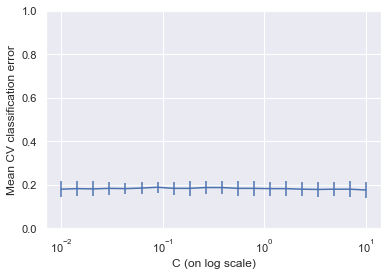

In [71]:
plt.errorbar(np.logspace(-2,1,precision), 1-results['mean_test_score'], yerr=results['std_test_score'])
plt.ylim([0,1])
# plt.xlim([0,10])
plt.xscale('log')
plt.grid(True)
plt.ylabel('Mean CV classification error')
plt.xlabel('C (on log scale)');

### 2.e
We can see that the classification performance does not really improve with a more complex model. It appears that with a linear kernel, the dataset is separated rather well. We can thus select the best performer with a linear kernel as C = 0.01. Thus, our classification performance remains the same.

### 2.f
The higher the value of gamma, the smaller value of the RBF function evaluates to. The RBF function returns a measure of how much influence two samples have on each other, in infinite dimensions. Increasing the value of gamma means that pairs of observations are less influential, and the influence decays faster with distance. Thus, the smaller the gamma, the farther training examples can influence the decision boundary. This makes the decision boundary less erratic, and thus simpler.

In [111]:
svc_cv = SVC()
precision = 30
param_grid = {'gamma': np.logspace(-4,-1,precision), 'C': np.logspace(-2,1,precision)}
ridge_grid_cv = ms.GridSearchCV(svc_cv, param_grid, cv=10, n_jobs=-1)
ridge_grid_cv.fit(X_train, Y_train)
results = pd.DataFrame(ridge_grid_cv.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013002,0.000447,0.005001,3.405298e-07,0.01,0.0001,"{'C': 0.01, 'gamma': 0.0001}",0.6125,0.6125,0.6125,0.6125,0.6125,0.6000,0.6000,0.6000,0.6000,0.6000,0.60625,0.006250,541
1,0.014703,0.000459,0.004601,4.901351e-04,0.01,0.000127,"{'C': 0.01, 'gamma': 0.0001268961003167922}",0.6125,0.6125,0.6125,0.6125,0.6125,0.6000,0.6000,0.6000,0.6000,0.6000,0.60625,0.006250,541
2,0.016303,0.005256,0.005001,4.473412e-04,0.01,0.000161,"{'C': 0.01, 'gamma': 0.0001610262027560939}",0.6125,0.6125,0.6125,0.6125,0.6125,0.6000,0.6000,0.6000,0.6000,0.6000,0.60625,0.006250,541
3,0.014803,0.000400,0.004501,6.709140e-04,0.01,0.000204,"{'C': 0.01, 'gamma': 0.00020433597178569417}",0.6125,0.6125,0.6125,0.6125,0.6125,0.6000,0.6000,0.6000,0.6000,0.6000,0.60625,0.006250,541
4,0.014403,0.001281,0.004001,1.095431e-03,0.01,0.000259,"{'C': 0.01, 'gamma': 0.0002592943797404667}",0.6125,0.6125,0.6125,0.6125,0.6125,0.6000,0.6000,0.6000,0.6000,0.6000,0.60625,0.006250,541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.010802,0.002401,0.002501,5.000830e-04,10.0,0.038566,"{'C': 10.0, 'gamma': 0.03856620421163472}",0.7750,0.8125,0.8125,0.8625,0.7750,0.7625,0.8500,0.8875,0.8500,0.7750,0.81625,0.041852,236
896,0.012203,0.001721,0.002601,8.002878e-04,10.0,0.048939,"{'C': 10.0, 'gamma': 0.04893900918477494}",0.7625,0.8000,0.8125,0.8500,0.7750,0.7625,0.8375,0.8500,0.8375,0.7625,0.80500,0.035444,369
897,0.010702,0.002648,0.002501,5.000354e-04,10.0,0.062102,"{'C': 10.0, 'gamma': 0.06210169418915616}",0.7750,0.7625,0.8000,0.8500,0.7875,0.7625,0.8375,0.8500,0.8375,0.7625,0.80250,0.035707,384
898,0.013903,0.002119,0.003101,3.000261e-04,10.0,0.078805,"{'C': 10.0, 'gamma': 0.07880462815669913}",0.7625,0.7625,0.8125,0.8375,0.7875,0.7625,0.8125,0.8500,0.8375,0.7250,0.79500,0.039211,414


<AxesSubplot:xlabel='param_gamma', ylabel='param_C'>

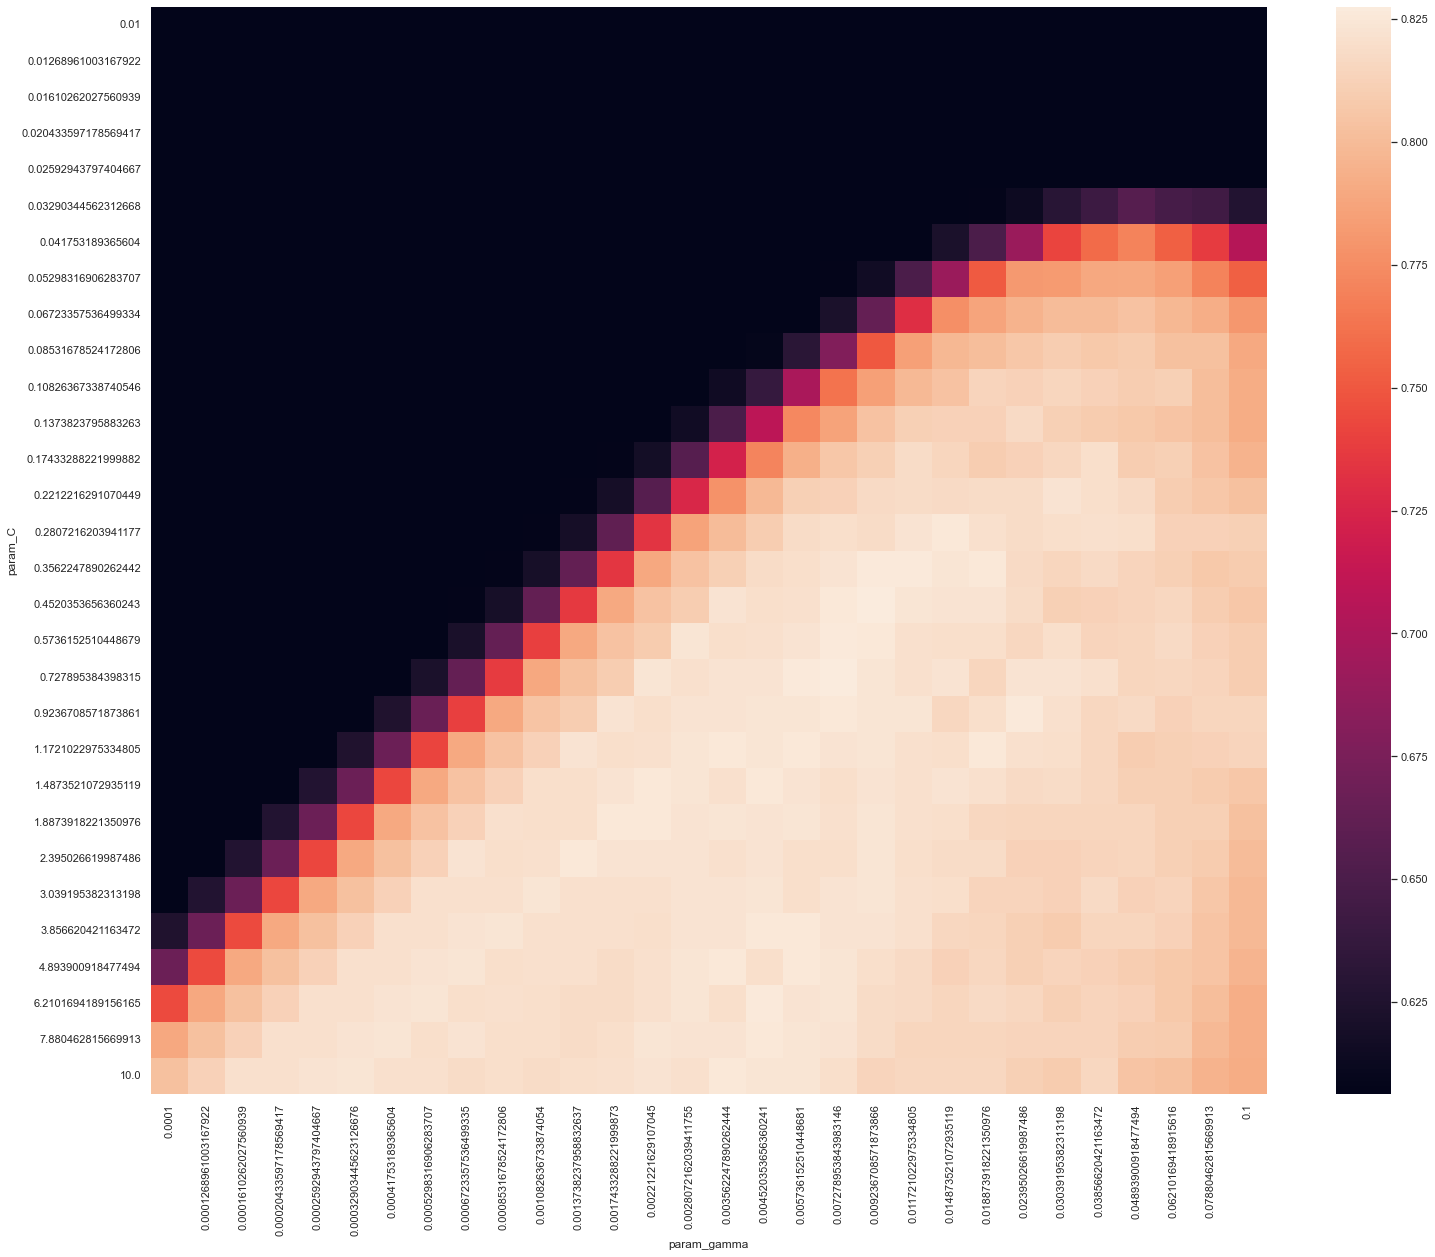

In [112]:
plt.figure(figsize=[25,20])
sns.heatmap(results[['param_C','param_gamma','mean_test_score']].pivot(index='param_C', columns='param_gamma', values='mean_test_score'))

<AxesSubplot:xlabel='param_gamma', ylabel='param_C'>

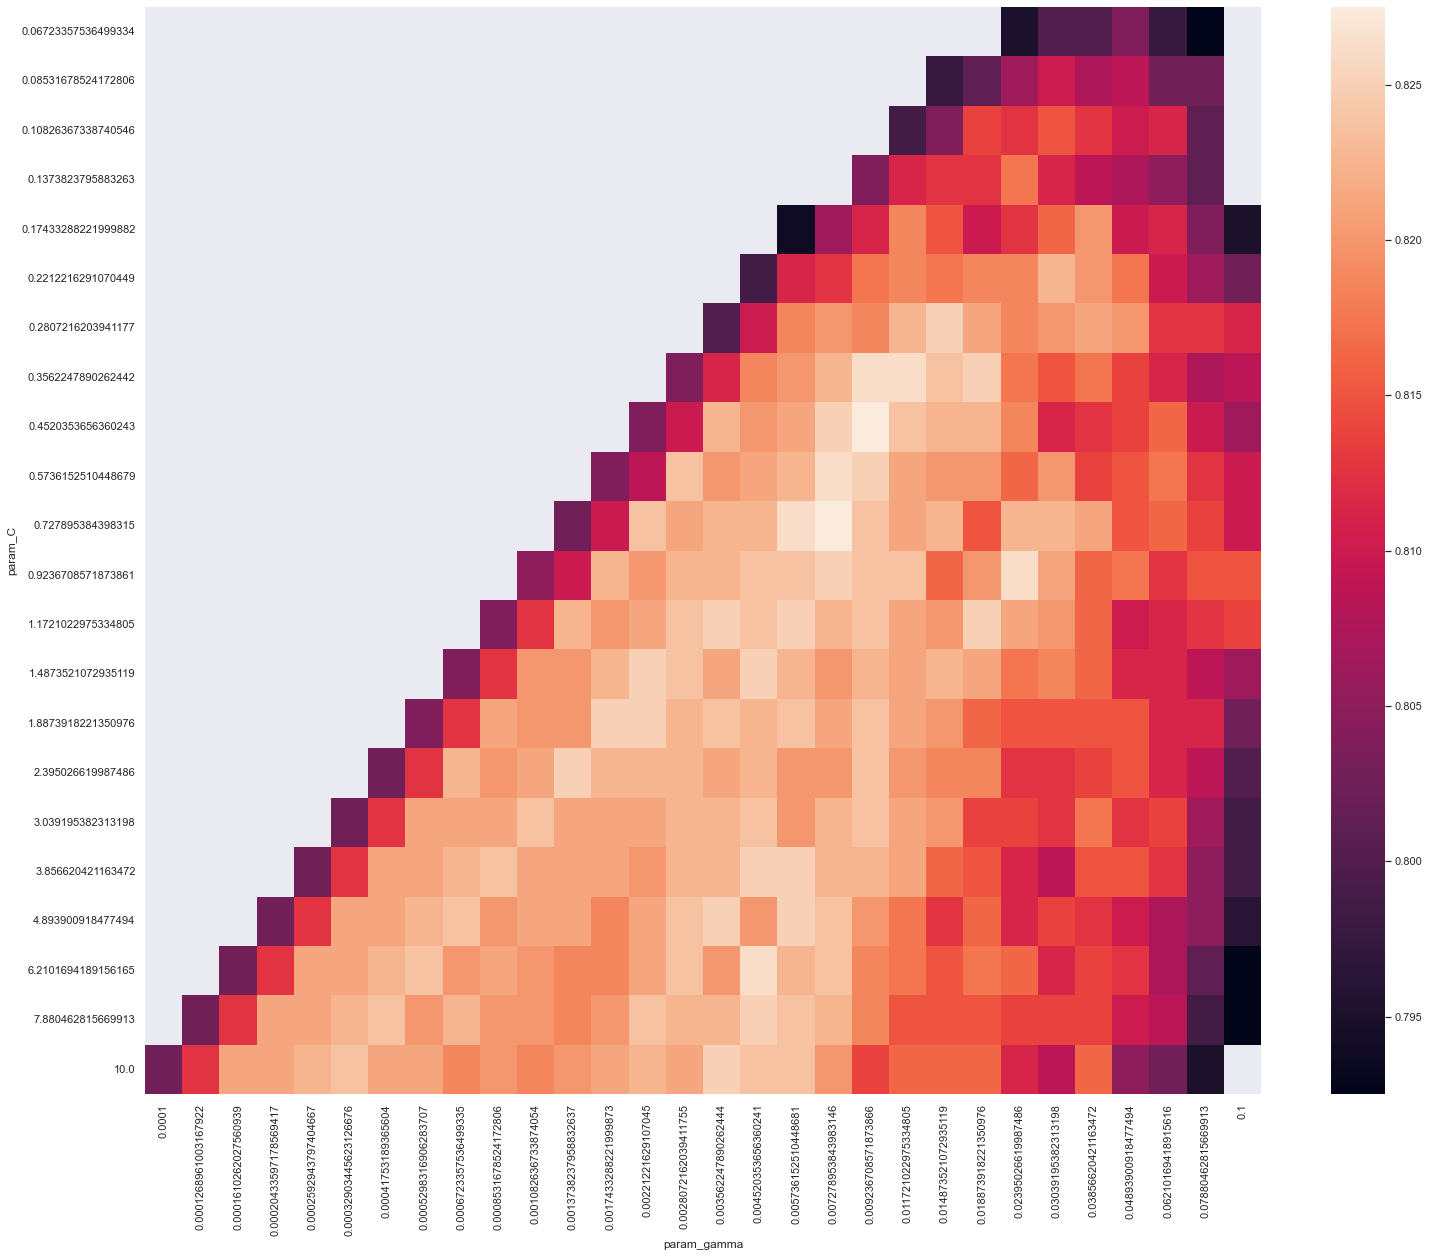

In [113]:
sorted_results = results.sort_values(by='mean_test_score', axis=0, ascending=False)
acceptable = sorted_results.loc[sorted_results['mean_test_score'] > (sorted_results['mean_test_score'].iloc[0] - sorted_results['std_test_score'].iloc[0])]
plt.figure(figsize=[25,20])
sns.heatmap(acceptable[['param_C','param_gamma','mean_test_score']].pivot(index='param_C', columns='param_gamma', values='mean_test_score'))

In [114]:
acceptable

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
499,0.014903,0.004785,0.004101,0.000300,0.452035,0.009237,"{'C': 0.4520353656360243, 'gamma': 0.009236708...",0.8500,0.8000,0.8125,0.8250,0.7750,0.8125,0.8500,0.9000,0.8625,0.7875,0.82750,0.036142,1
558,0.013103,0.001700,0.006402,0.005124,0.727895,0.007279,"{'C': 0.727895384398315, 'gamma': 0.0072789538...",0.8375,0.8125,0.8125,0.8250,0.7750,0.8125,0.8500,0.9000,0.8625,0.7875,0.82750,0.034821,1
470,0.013003,0.000447,0.004001,0.000447,0.356225,0.011721,"{'C': 0.3562247890262442, 'gamma': 0.011721022...",0.8375,0.8000,0.8125,0.8250,0.7750,0.8125,0.8500,0.9000,0.8625,0.7875,0.82625,0.035554,3
469,0.013303,0.000640,0.004101,0.000300,0.356225,0.009237,"{'C': 0.3562247890262442, 'gamma': 0.009236708...",0.8500,0.8000,0.8125,0.8250,0.7750,0.8125,0.8500,0.8750,0.8750,0.7875,0.82625,0.033284,4
593,0.011603,0.000490,0.003401,0.000490,0.923671,0.02395,"{'C': 0.9236708571873861, 'gamma': 0.023950266...",0.8000,0.8125,0.8250,0.8500,0.8000,0.7750,0.8625,0.9125,0.8375,0.7875,0.82625,0.038911,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,0.013903,0.002119,0.003101,0.000300,10.0,0.078805,"{'C': 10.0, 'gamma': 0.07880462815669913}",0.7625,0.7625,0.8125,0.8375,0.7875,0.7625,0.8125,0.8500,0.8375,0.7250,0.79500,0.039211,414
377,0.015803,0.000400,0.005101,0.000300,0.174333,0.005736,"{'C': 0.17433288221999882, 'gamma': 0.00573615...",0.8375,0.7750,0.8000,0.8125,0.7375,0.7750,0.8000,0.8125,0.8750,0.7125,0.79375,0.044459,416
839,0.012503,0.000500,0.002901,0.000300,6.210169,0.1,"{'C': 6.2101694189156165, 'gamma': 0.1}",0.7500,0.7625,0.8000,0.8375,0.7750,0.7625,0.8250,0.8500,0.8375,0.7250,0.79250,0.041155,417
268,0.016504,0.001432,0.005101,0.000300,0.067234,0.078805,"{'C': 0.06723357536499334, 'gamma': 0.07880462...",0.7750,0.8250,0.8000,0.8125,0.7375,0.7875,0.8250,0.8250,0.8000,0.7375,0.79250,0.031721,418
